# Buscando ponto de corte em imagem definido através do histograma de soma horizontal

## Importando bibliotecas

In [1]:
import numpy as np
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from skimage.io import imread

from img_edit import best_rgb, rgb_to_color

sns.set_style(style='darkgrid')
plt.gray()

LIMITES_DE_NORMALIZACAO = [8, 10, 12, 14, 16]

COLOR_NAMES = ['vermelho', 'verde', 'azul']
COLOR_CODES = ['r-', 'g-', 'b-', 'brown-', 'orange-']

<Figure size 432x288 with 0 Axes>

In [2]:
path_list = []
with ZipFile('./toras.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./toras.zip/{path}')

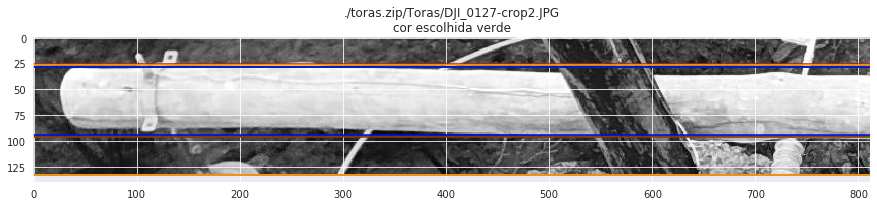

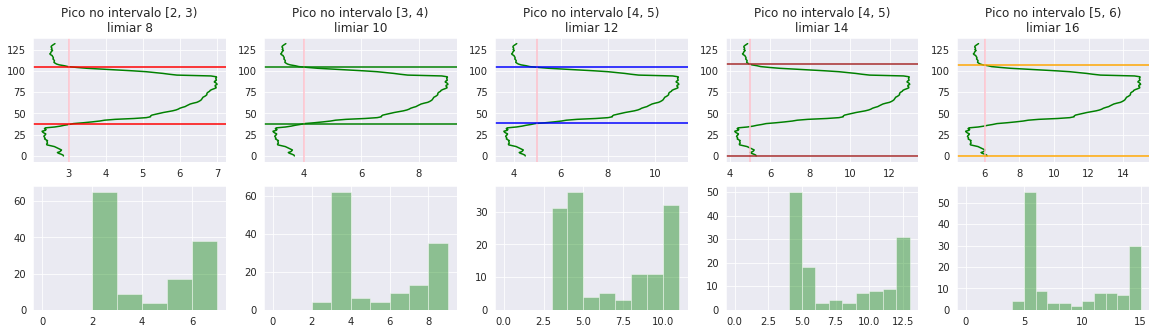

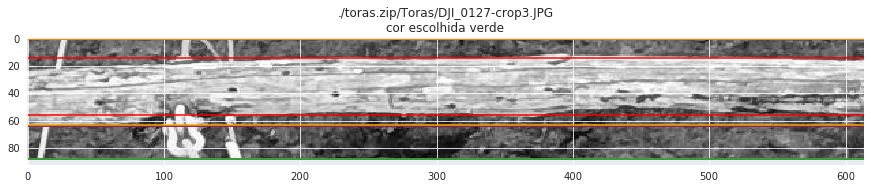

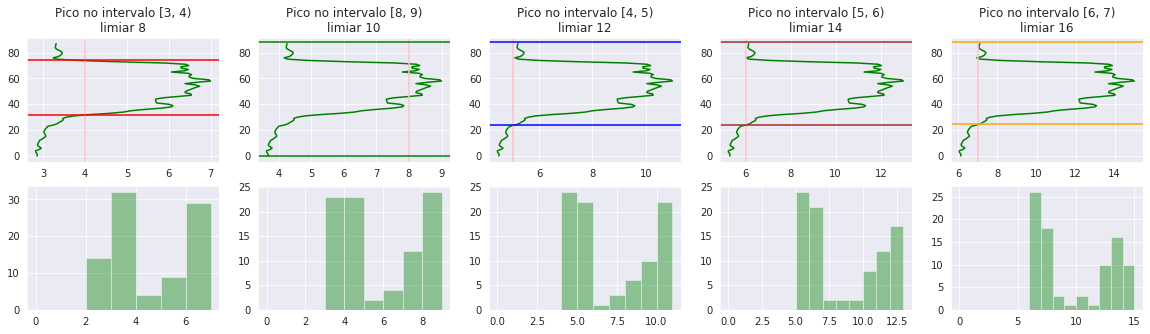

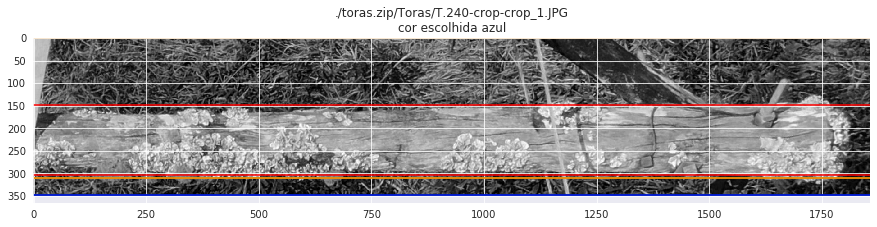

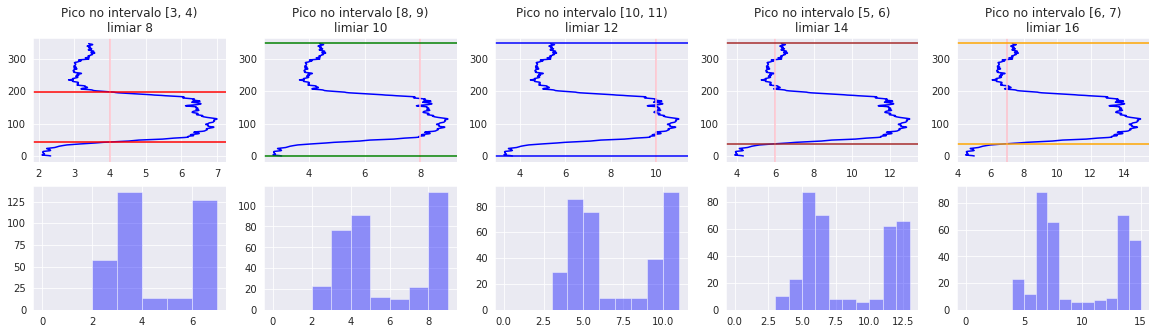

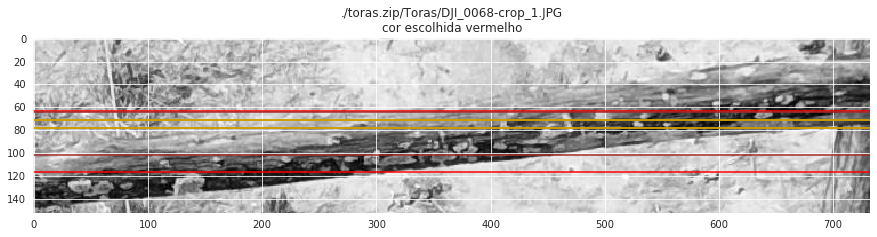

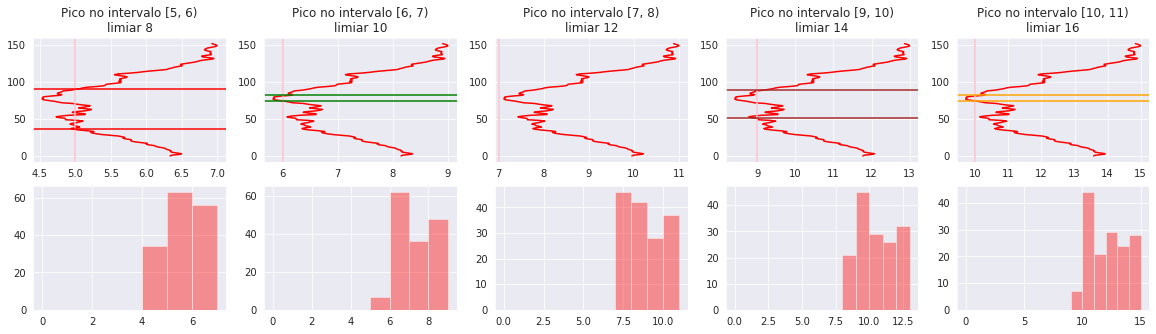

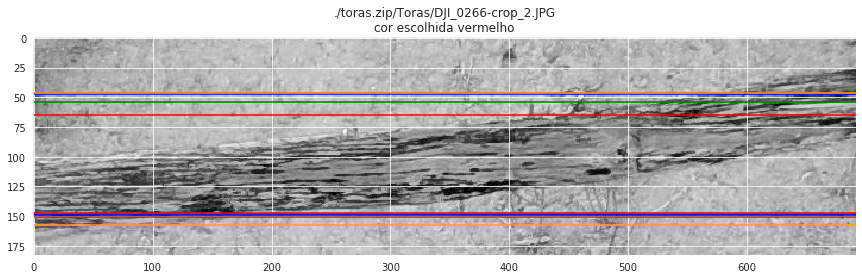

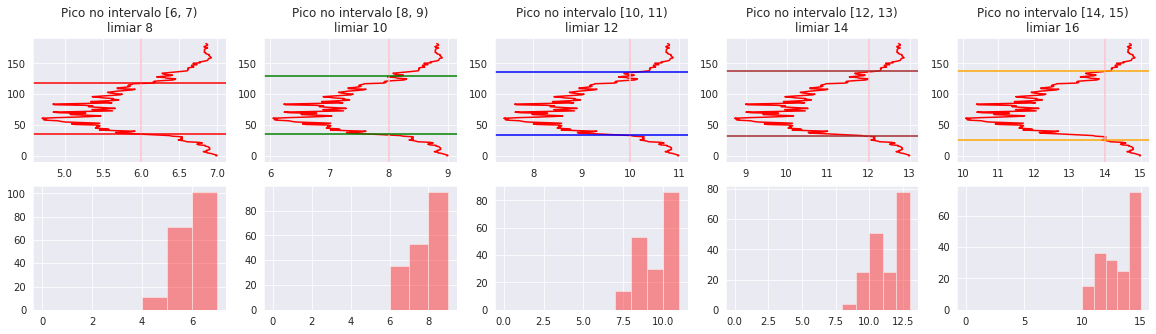

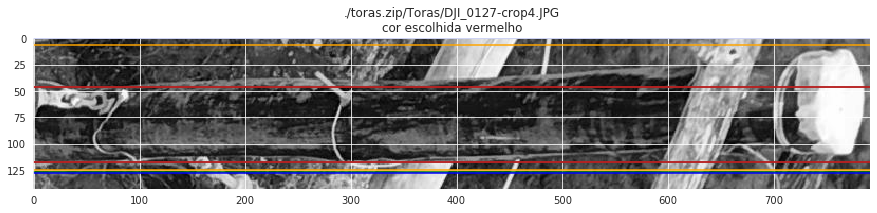

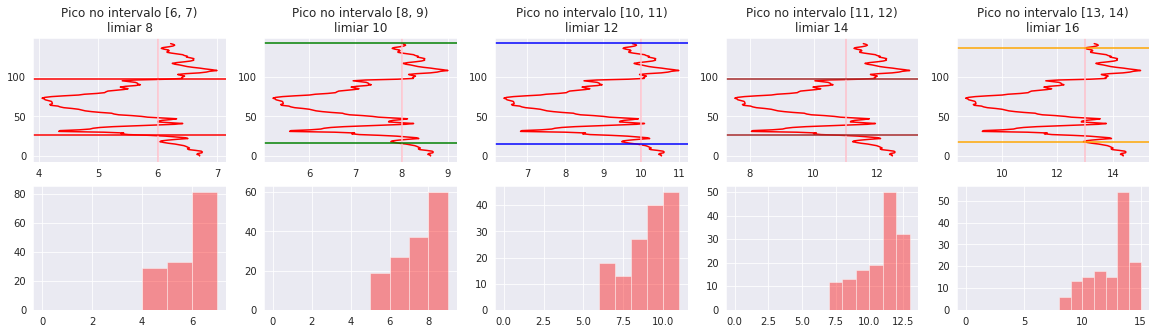

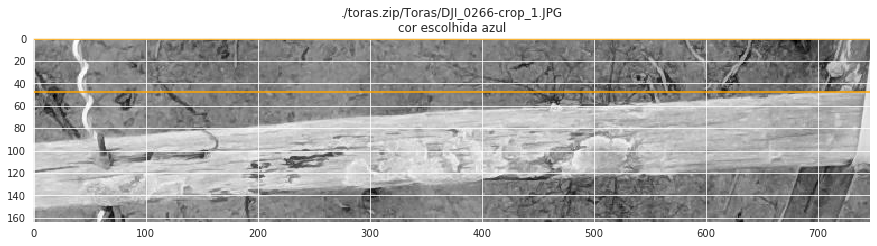

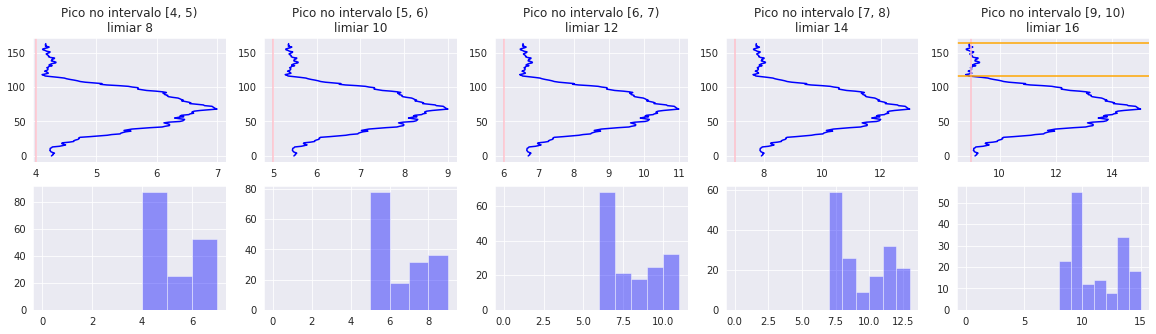

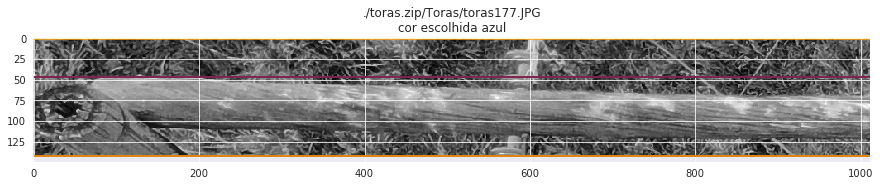

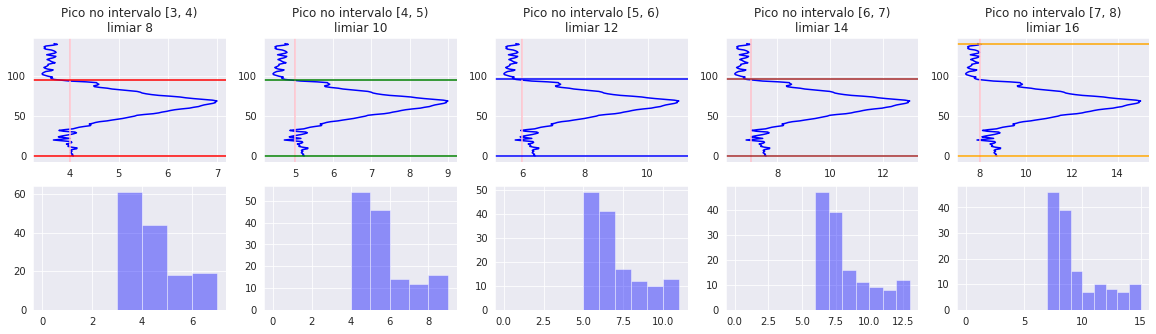

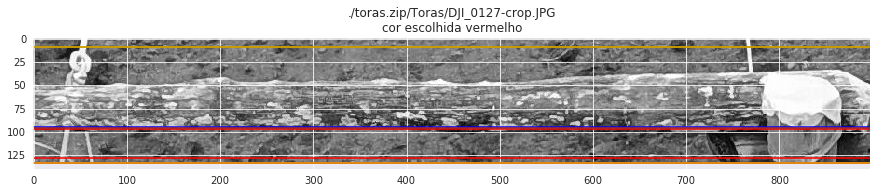

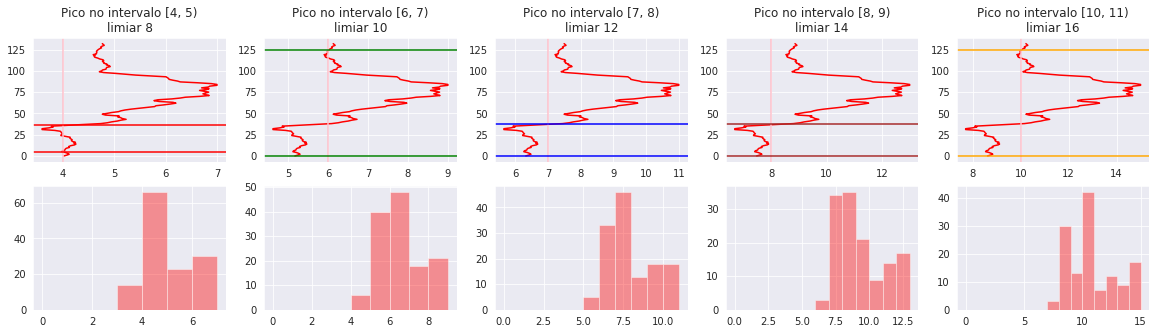

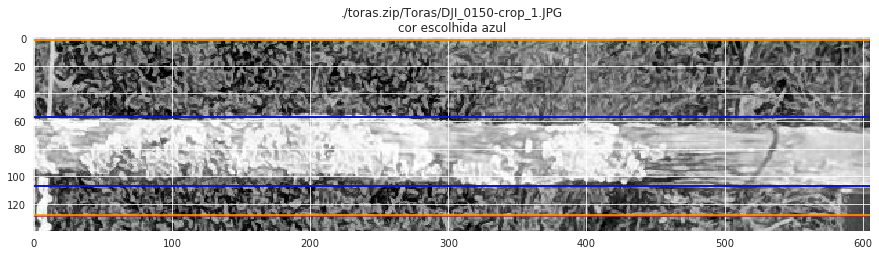

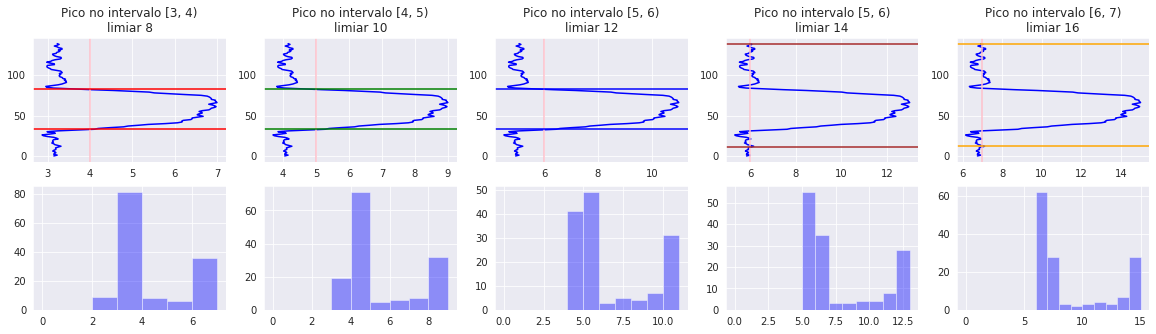

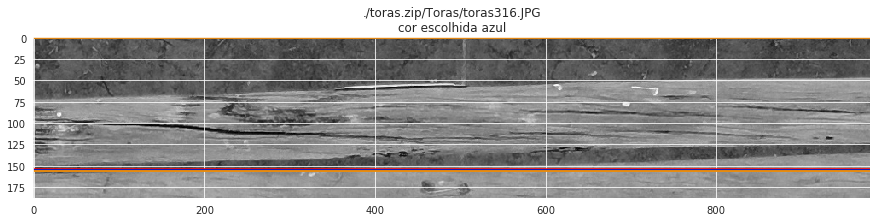

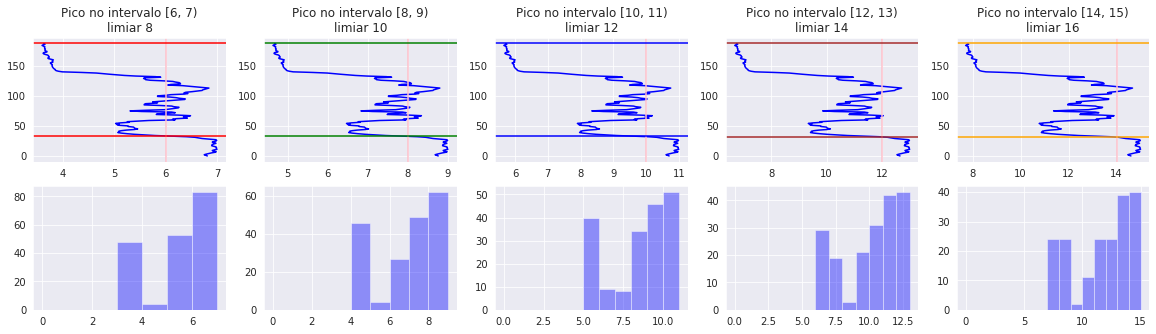

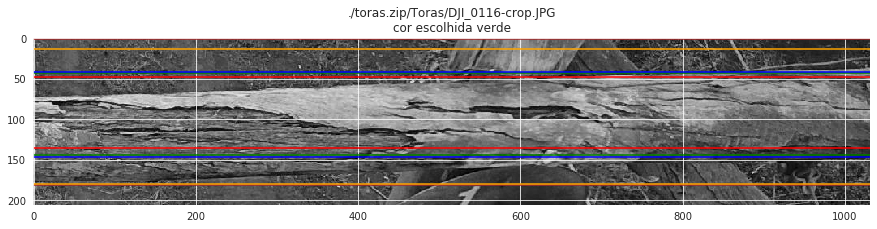

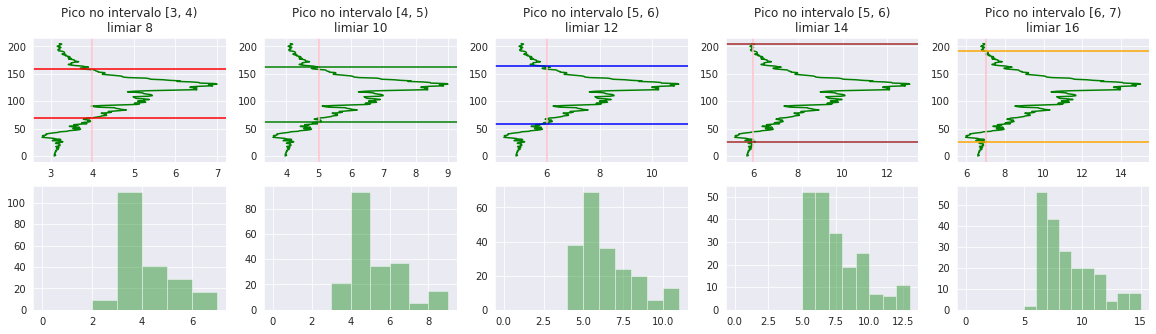

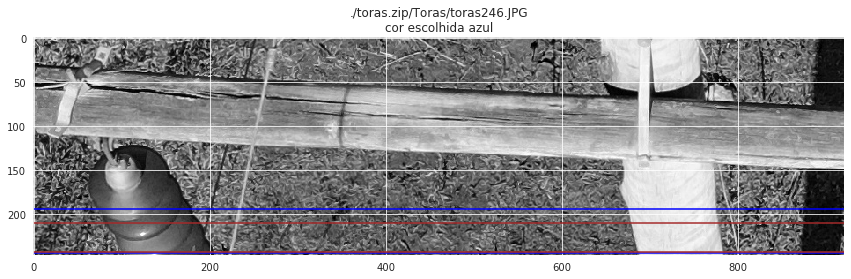

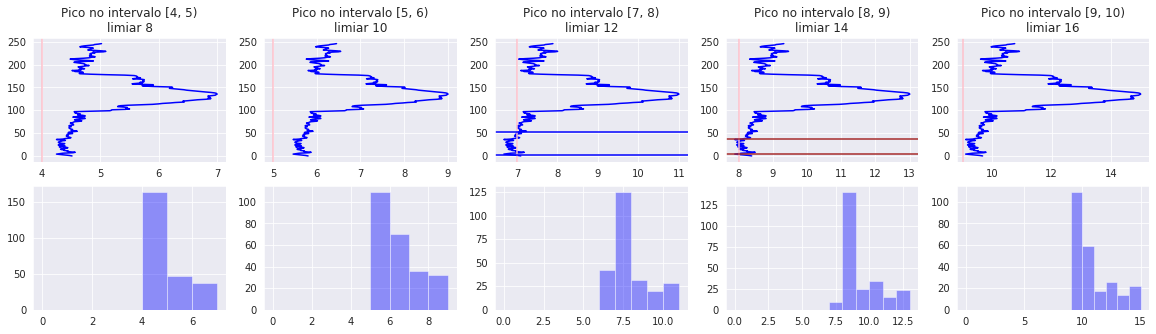

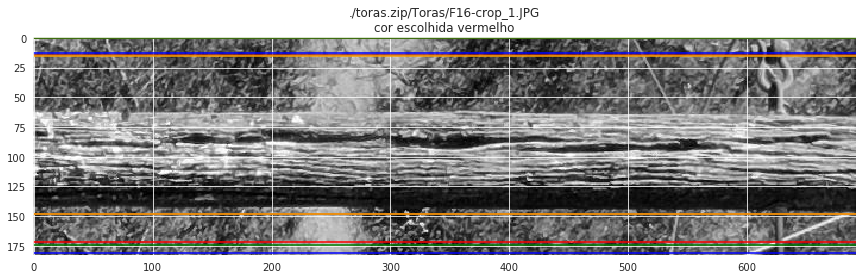

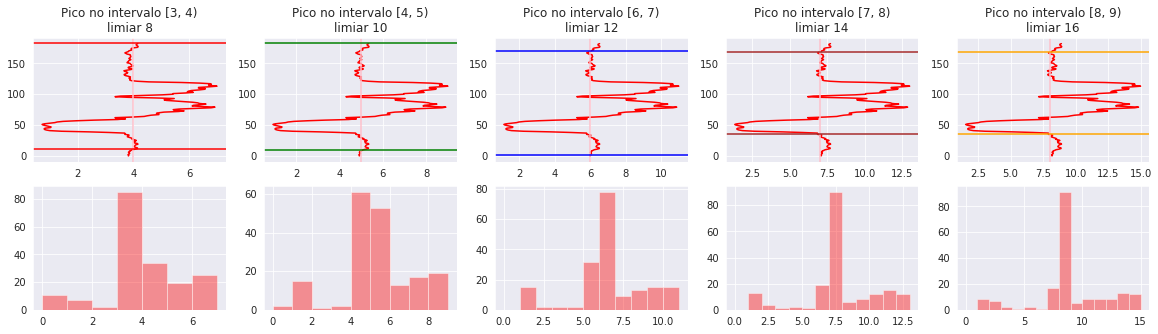

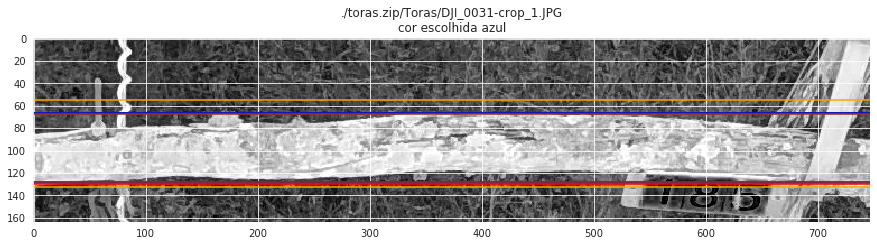

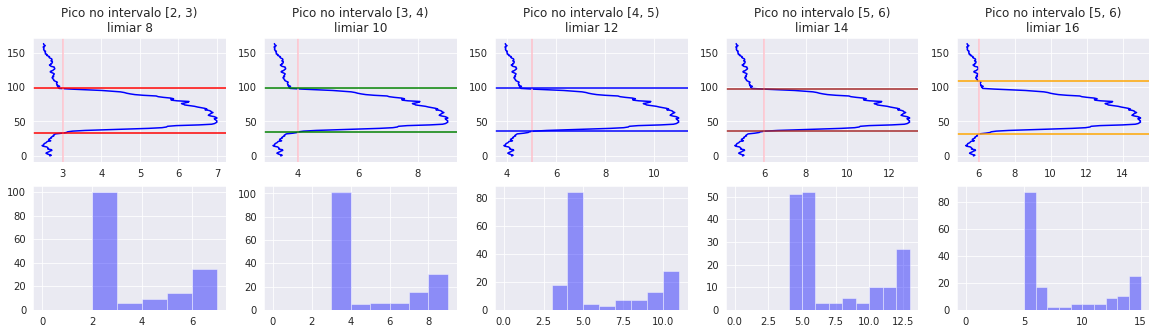

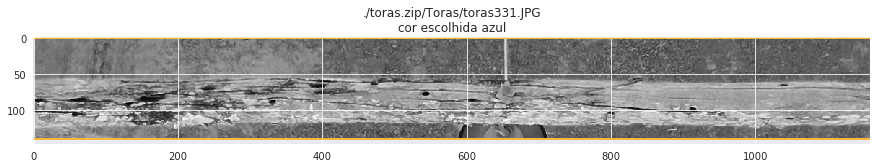

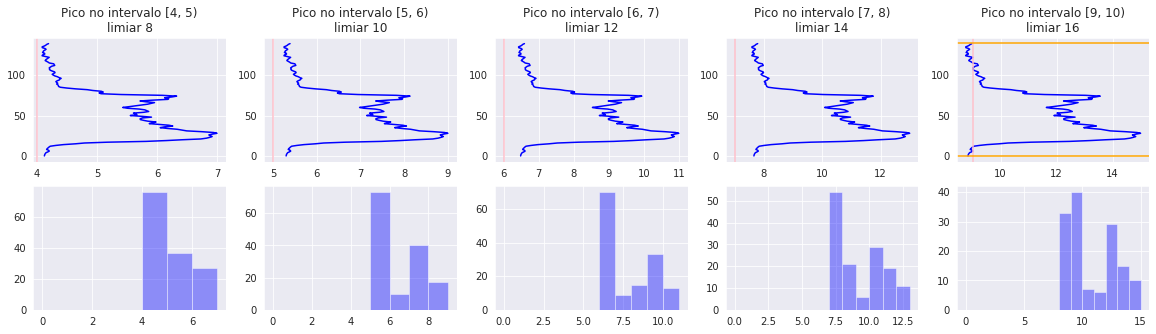

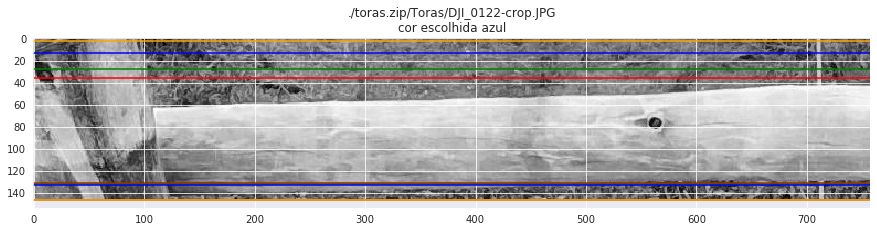

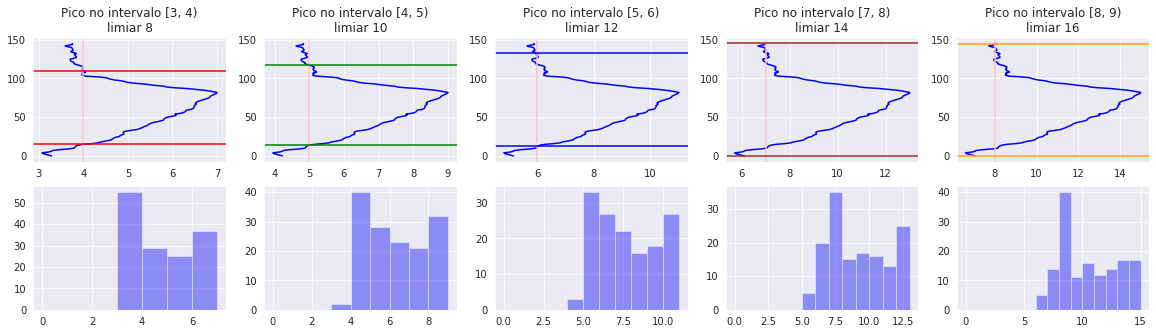

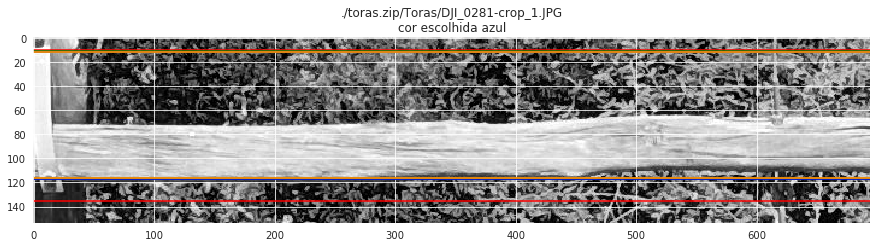

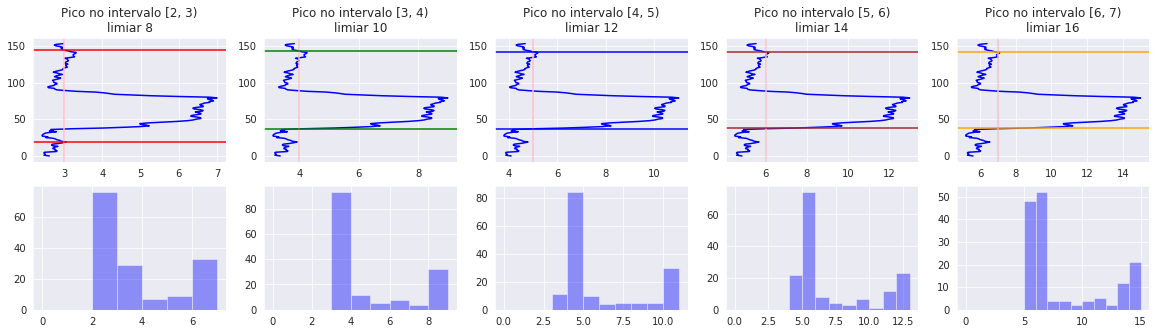

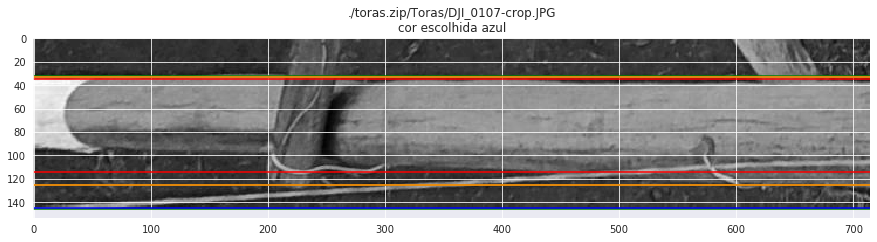

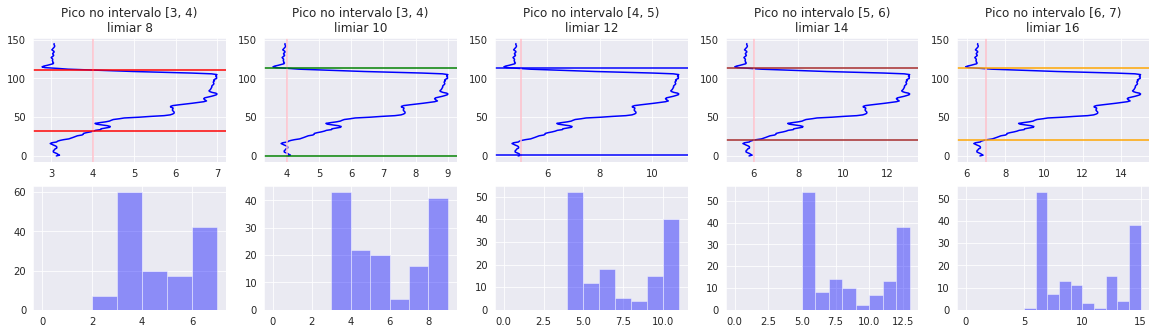

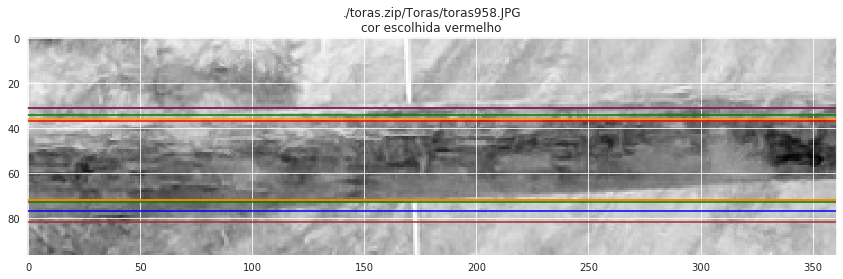

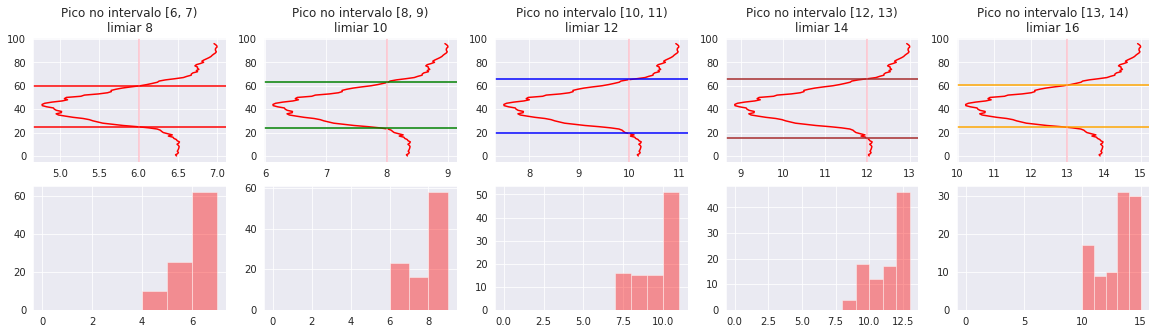

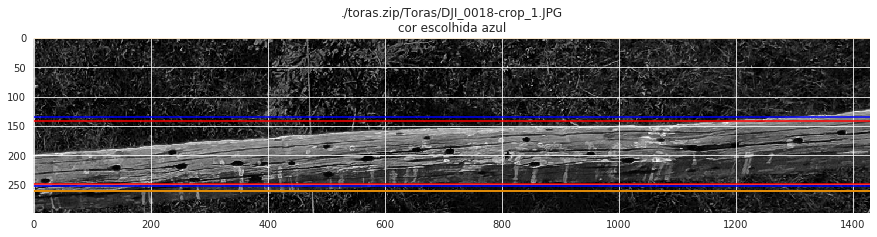

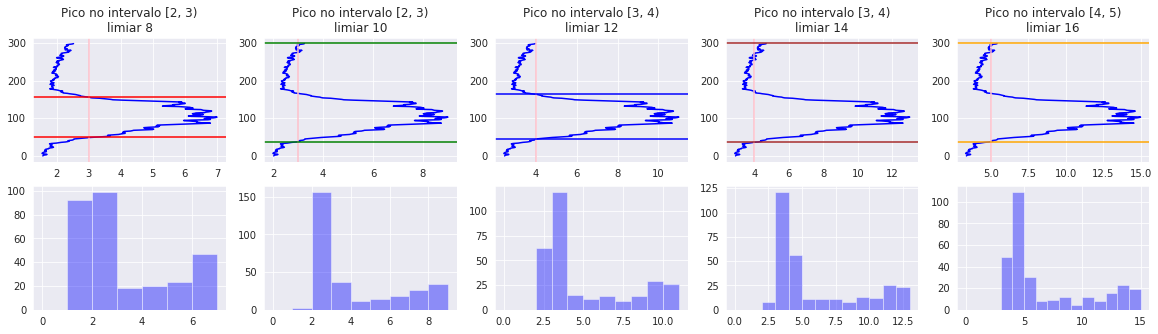

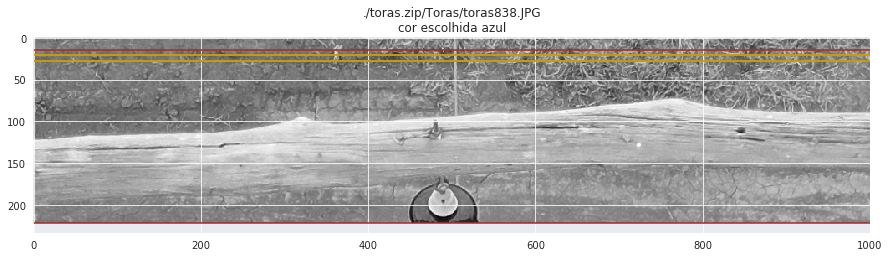

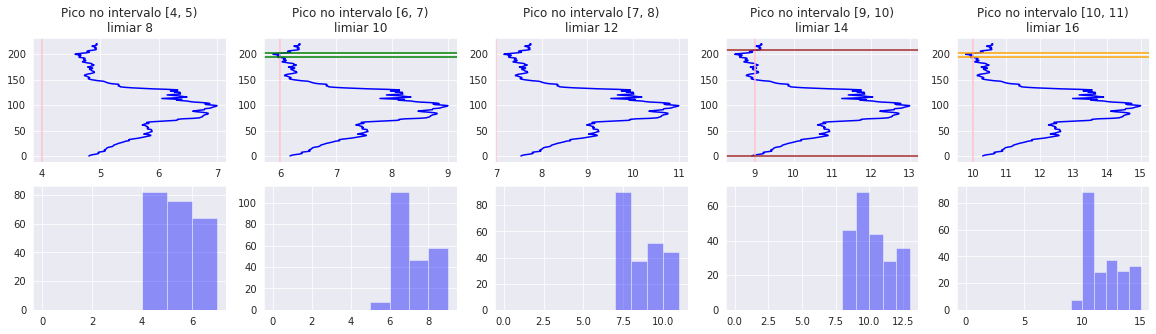

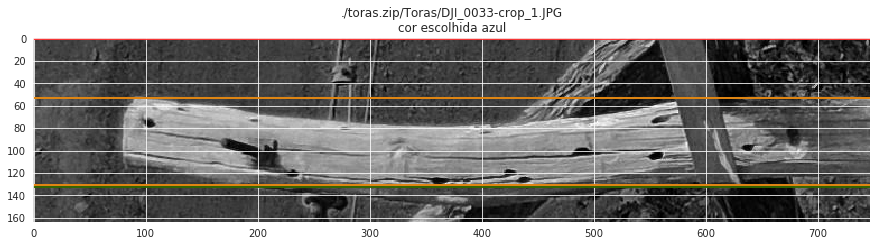

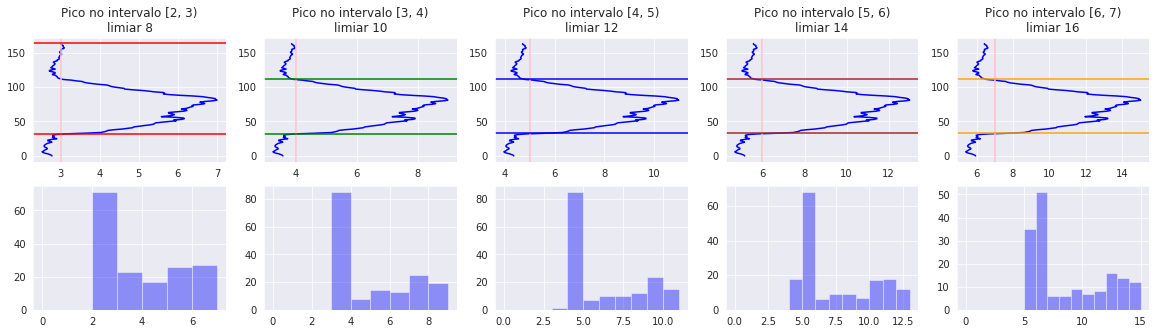

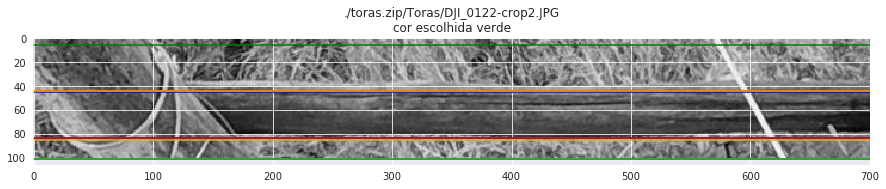

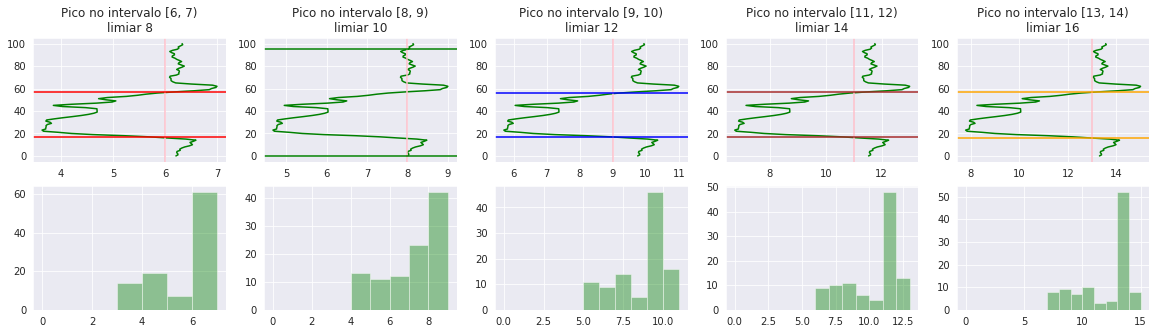

In [3]:
for path in path_list:
  # lendo imagem RGB
  img = imread(path)

  # Escolhendo qual cor apresenta maior variação
  cor_v, cor_h = best_rgb(img)

  # Plotando imagens
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))

  # somas verticais e horizontais
  new_img = rgb_to_color(img, cor_h)
  h, w = new_img.shape

  # Exibindo imagem da cor selecionada
  ax.title.set_text(f'{path}\ncor escolhida {COLOR_NAMES[cor_h]}')
  ax.imshow(new_img)

  
  fig2, ax2 = plt.subplots(nrows=2, ncols=len(LIMITES_DE_NORMALIZACAO), figsize=(20, 5))
  for i, lim in enumerate(LIMITES_DE_NORMALIZACAO):
    soma_horizontal = new_img.sum(axis=1)
    soma_normalizada = soma_horizontal * (lim - 1)/soma_horizontal.max()

    # Plotando soma horizontal
    ax2[0, i].plot(soma_normalizada,
                   range(h-1, -1, -1),
                   COLOR_CODES[cor_h])

    # Desenhando linhas sobre borda da tora
    hist, bins = np.histogram(soma_normalizada, range(lim))

    n = len(hist)
    pos = hist.argmax()
    limiar = bins[pos + int(pos < n/2)]
    ax2[0, i].axvline(limiar, color='pink')
    # cond = '>' if pos < n/2 else '<'
    # print(f'para quando v {cond} {limiar}')  

    stop_cond = (lambda y: y > limiar) if pos < n/2 else (lambda y: y < limiar)
    # de cima para baixo
    for j, v in enumerate(soma_normalizada):
      if stop_cond(v):
        ax.axhline(j, color=COLOR_CODES[i][:-1])
        ax2[0, i].axhline(h - j, color=COLOR_CODES[i][:-1])
        break
    # de baixo para cima
    for j, v in enumerate(soma_normalizada[::-1]):
      if stop_cond(v):
        ax.axhline(h - j, color=COLOR_CODES[i][:-1])
        ax2[0, i].axhline(j, color=COLOR_CODES[i][:-1])
        break

    # Plotando histograma
    ax2[0, i].title.set_text(f'Pico no intervalo [{bins[pos]}, {bins[pos] + 1})\nlimiar {lim}')
    sns.distplot(
      a=soma_normalizada,
      bins=range(lim),
      kde=False,
      ax=ax2[1, i],
      color=COLOR_CODES[cor_h][0])

  plt.show()
